# KNN no `chb15_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb15_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.926471,0.970588,0.985294,0.985294,0.926471,0.970588,0.985294,0.985294,0.882353,0.897059,0.985294,0.985294,0.955882,0.955882,0.867647,0.985294,0.970588,0.882353
1,0.926471,0.985294,1.000000,1.000000,0.926471,0.985294,1.000000,0.985294,0.911765,0.838235,1.000000,1.000000,0.941176,1.000000,0.838235,1.000000,0.970588,0.808824
2,0.926471,0.955882,1.000000,1.000000,0.911765,0.985294,0.985294,1.000000,0.882353,0.808824,1.000000,0.985294,0.926471,0.955882,0.823529,1.000000,0.911765,0.867647
3,0.926471,0.941176,1.000000,1.000000,0.911765,1.000000,0.985294,1.000000,0.867647,0.897059,1.000000,0.985294,0.955882,0.941176,0.897059,1.000000,0.955882,0.852941
4,0.955882,1.000000,1.000000,1.000000,0.941176,1.000000,1.000000,1.000000,0.882353,0.852941,1.000000,1.000000,0.911765,1.000000,0.897059,1.000000,0.955882,0.838235
5,0.941176,0.970588,0.985294,0.985294,0.941176,0.970588,0.970588,0.985294,0.926471,0.852941,0.985294,0.970588,0.970588,0.955882,0.867647,0.985294,0.955882,0.882353
6,0.926471,0.970588,1.000000,1.000000,0.970588,1.000000,0.985294,1.000000,0.838235,0.882353,1.000000,0.985294,0.970588,0.941176,0.897059,1.000000,0.941176,0.794118
7,0.882353,0.985294,1.000000,1.000000,0.911765,1.000000,0.985294,1.000000,0.838235,0.882353,1.000000,0.985294,0.955882,0.985294,0.897059,1.000000,0.970588,0.882353
8,0.926471,1.000000,1.000000,1.000000,0.970588,1.000000,1.000000,1.000000,0.941176,0.852941,1.000000,1.000000,0.985294,0.985294,0.911765,1.000000,0.985294,0.897059
9,0.897059,0.955882,0.985294,0.985294,0.897059,1.000000,0.970588,0.985294,0.882353,0.882353,0.985294,0.970588,0.882353,0.955882,0.867647,0.985294,0.955882,0.867647


,count,mean,std,min,25%,50%,75%,max
2,20.0,0.996324,0.006533,0.985294,0.996324,1.000000,1.000000,1.000000
10,20.0,0.996324,0.006533,0.985294,0.996324,1.000000,1.000000,1.000000
7,20.0,0.995588,0.006914,0.985294,0.985294,1.000000,1.000000,1.000000
15,20.0,0.994853,0.007196,0.985294,0.985294,1.000000,1.000000,1.000000
3,20.0,0.994118,0.007392,0.985294,0.985294,1.000000,1.000000,1.000000
6,20.0,0.988971,0.009392,0.970588,0.985294,0.985294,1.000000,1.000000
11,20.0,0.986029,0.012141,0.955882,0.985294,0.985294,1.000000,1.000000
5,20.0,0.986029,0.013890,0.955882,0.970588,0.985294,1.000000,1.000000
1,20.0,0.966912,0.024270,0.911765,0.955882,0.970588,0.985294,1.000000
13,20.0,0.966176,0.021916,0.926471,0.955882,0.955882,0.985294,1.000000


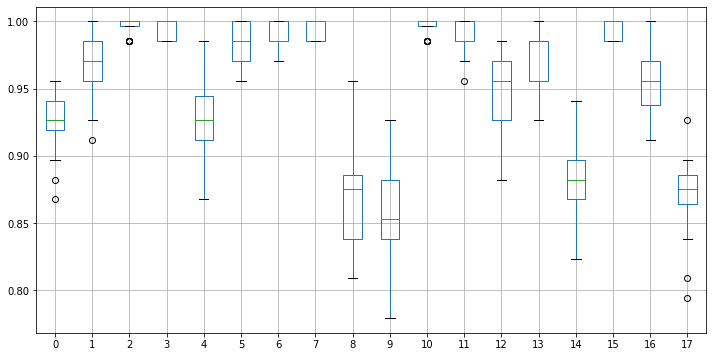

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '15'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.924265,0.024457,0.926471,15,0
1,0.966912,0.024270,0.970588,15,1
2,0.996324,0.006533,1.000000,15,2
3,0.994118,0.007392,1.000000,15,3
4,0.929412,0.031504,0.926471,15,4
5,0.986029,0.013890,0.985294,15,5
6,0.988971,0.009392,0.985294,15,6
7,0.995588,0.006914,1.000000,15,7
8,0.872794,0.039712,0.875000,15,8
9,0.858824,0.034538,0.852941,15,9
